## Comparing Metric #1 (off-ice error) and #2 (Sobel flow statistics)

### Analysis

#### 1. Basic information, importing modules

- Test area: **Kaskawulsh Glacier**
- Test packages: **CARST, Vmap, GIV, autoRIFT**
- Test pair: **Landsat 8 20180304-20180405**

In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
# import gftt
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

#### 2. Load the feature tracking data list and the metrics for each test

Each row is a feature tracking test using a specific parameter combination described in each field.

In [5]:
df = pd.read_csv('../results_2022.csv', dtype=str)
df['OIE-x'] = df['OIE-x'].astype(float)
df['OIE-y'] = df['OIE-y'].astype(float)
df['slope_max-normal-E'] = df['slope_max-normal-E'].astype(float)
df['slope_min-shear-E'] = df['slope_min-shear-E'].astype(float)
df['E_ratio'] = df['E_ratio'].astype(float)
df['OIE'] = (df['OIE-x'] * df['OIE-y']) ** 0.5
df

,Date,Chip (px),Resolution (px),Prefilter,Subpixel,Software,Vx,Vy,OIE-x,OIE-y,slope_max-shear-E,slope_min-normal-E,E_ratio,OIE
0,Sen2-20180304-20180314,48,12,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.503906,0.546875,0.071212,0.147663,0.482265,0.524951
1,Sen2-20180304-20180314,48,12,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.421875,0.429688,0.057826,0.101876,0.567611,0.425763
2,Sen2-20180304-20180314,48,12,None,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,2.367188,2.390625,0.080115,0.158693,0.504841,2.378877
3,Sen2-20180304-20180314,48,1,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.562500,0.546875,0.062518,0.120220,0.520035,0.554632
4,Sen2-20180304-20180314,48,1,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.421875,0.453125,0.035411,0.073263,0.483342,0.437221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Sen2-20180508-20180627,64,8,Gau,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,0.331250,0.531250,0.157609,0.332714,0.473707,0.419496
168,Sen2-20180508-20180627,32,4,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,0.256250,0.337500,0.187083,0.390503,0.479083,0.294082
169,Sen2-20180508-20180627,32,8,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,0.162500,0.246875,0.687276,1.228652,0.559374,0.200293
170,Sen2-20180508-20180627,64,4,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,0.168750,0.250000,0.176882,0.374439,0.472391,0.205396


In [21]:
datestrs = ['LS8-20180304-20180405', 'LS8-20180802-20180818', 'Sen2-20180304-20180314', 'Sen2-20180508-20180627']
demo = df.loc[df['Date'] == datestrs[0]]
# demo

,Date,Chip (px),Resolution (px),Prefilter,Subpixel,Software,Vx,Vy,OIE-x,OIE-y,slope_max-shear-E,slope_min-normal-E,E_ratio,OIE
18,LS8-20180304-20180405,32,1,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.454102,0.454102,0.114285,0.215343,0.530711,0.454102
19,LS8-20180304-20180405,32,1,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.461426,0.446777,0.085723,0.166247,0.515636,0.454042
20,LS8-20180304-20180405,32,1,None,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.659180,0.615234,0.149702,0.300377,0.498380,0.636828
21,LS8-20180304-20180405,32,4,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.399170,0.402832,0.129019,0.242519,0.531994,0.400997
22,LS8-20180304-20180405,32,4,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.369873,0.380859,0.099402,0.169246,0.587326,0.375326
23,LS8-20180304-20180405,32,4,None,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.633545,0.556641,0.182328,0.347317,0.524962,0.593849
24,LS8-20180304-20180405,32,8,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.382690,0.380859,0.151278,0.291048,0.519771,0.381774
25,LS8-20180304-20180405,32,8,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.382690,0.373535,0.123341,0.205130,0.601282,0.378085
26,LS8-20180304-20180405,32,8,None,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.593262,0.541992,0.199948,0.383666,0.521151,0.567048
27,LS8-20180304-20180405,64,1,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.212402,0.263672,0.121248,0.253366,0.478549,0.236653


#### 3. Sobel flow statistics VS Off-ice error

<AxesSubplot:xlabel='OIE', ylabel='E_ratio'>

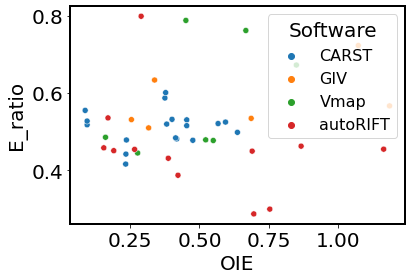

In [22]:
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Software')

<AxesSubplot:xlabel='OIE', ylabel='E_ratio'>

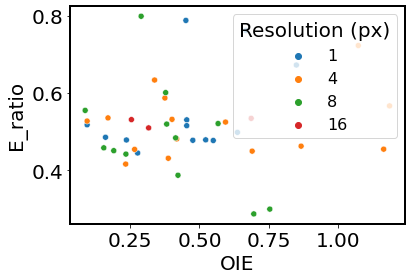

In [23]:
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Resolution (px)')

<AxesSubplot:xlabel='OIE', ylabel='E_ratio'>

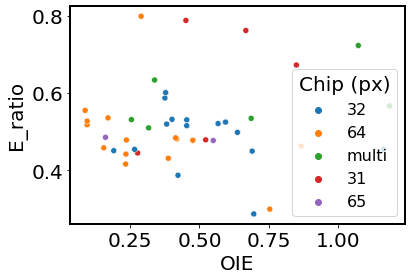

In [24]:
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Chip (px)')

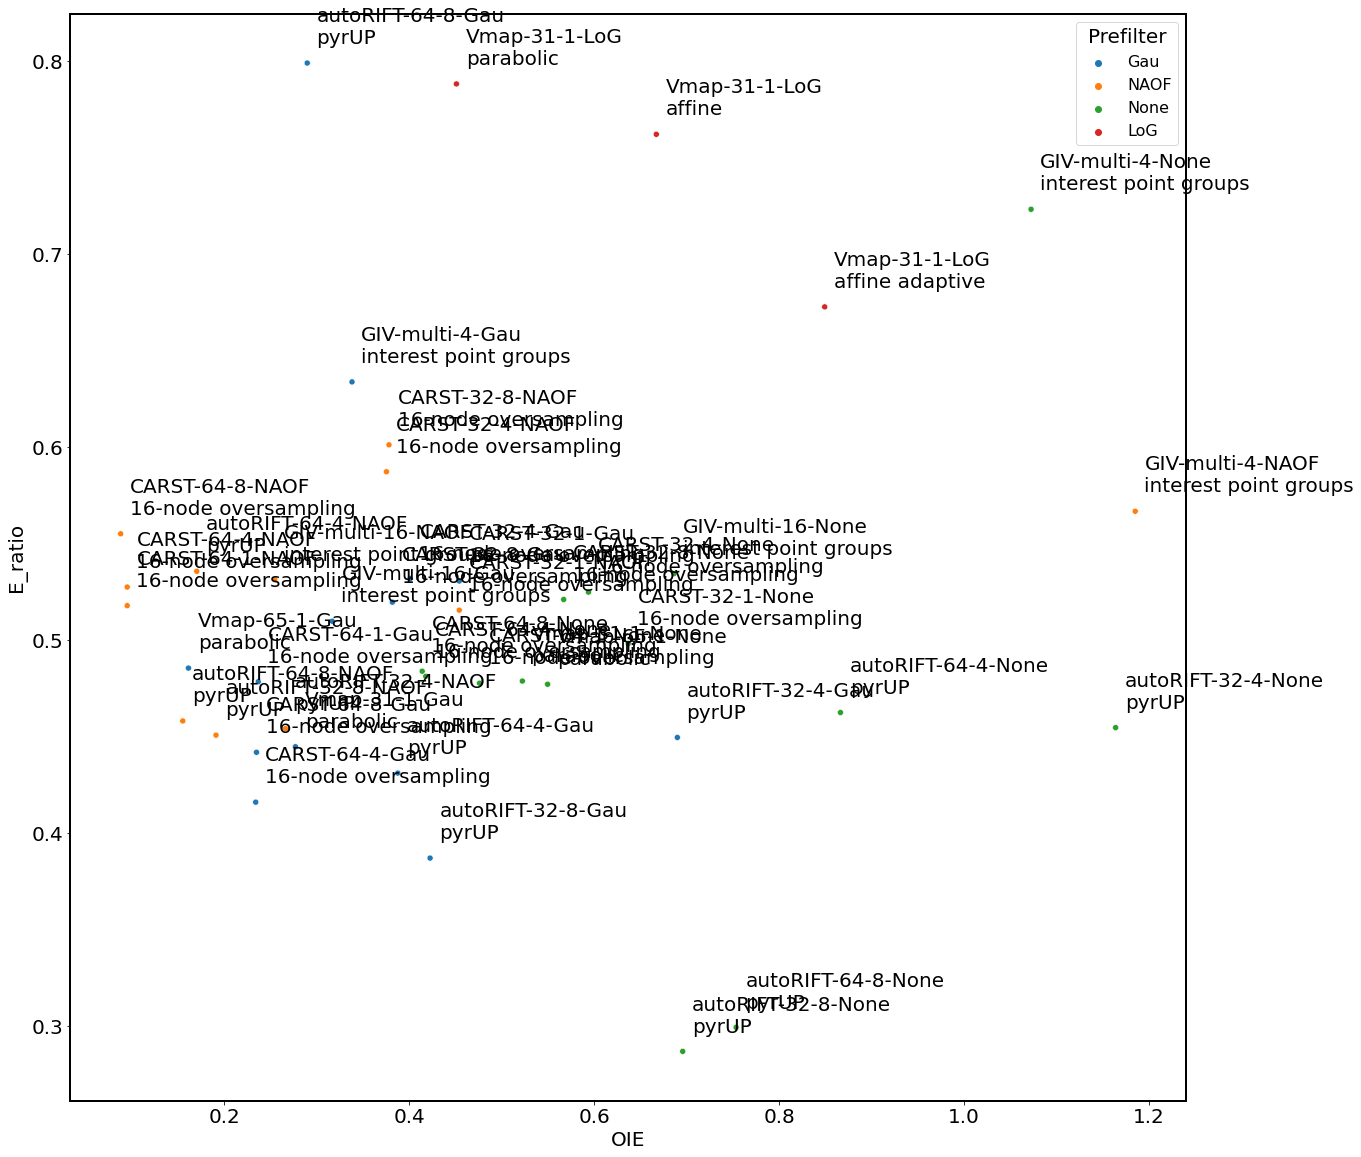

In [25]:
fig, ax5 = plt.subplots(1, 1, figsize=(20, 20))

sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', ax=ax5)

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel
    ax5.text(row['OIE'] + 0.01, row['E_ratio'] + 0.01, label)


#### 4. AGU 2021 poster, Figure 3

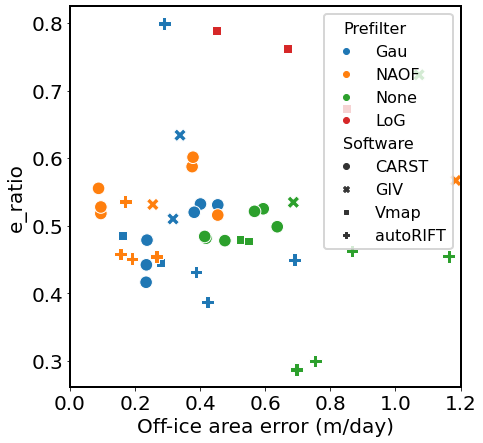

In [26]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
matplotlib.rc('axes', **axes_settings)
fig, ax6 = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
ax6.set_xlabel('Off-ice area error (m/day)')
ax6.set_ylabel('e_ratio')
ax6.set_xlim(0, 1.2)
legend = ax6.get_legend()
# legend.set_size(10)
legend.get_frame().set_linewidth(2)
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('OIE-vs-SS_updated.svg')

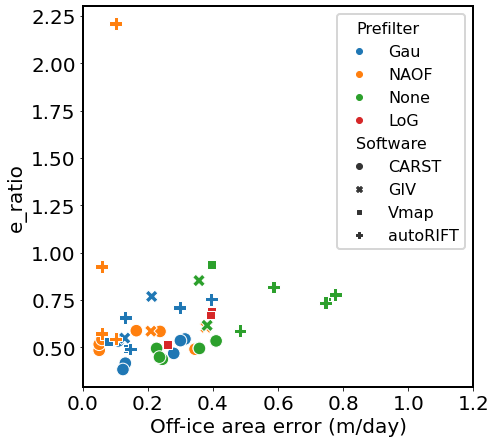

In [32]:
demo = df.loc[df['Date'] == datestrs[1]]
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
matplotlib.rc('axes', **axes_settings)
fig, ax6 = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
ax6.set_xlabel('Off-ice area error (m/day)')
ax6.set_ylabel('e_ratio')
ax6.set_xlim(0, 1.2)
legend = ax6.get_legend()
# legend.set_size(10)
legend.get_frame().set_linewidth(2)
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('OIE-vs-SS_updated.svg')

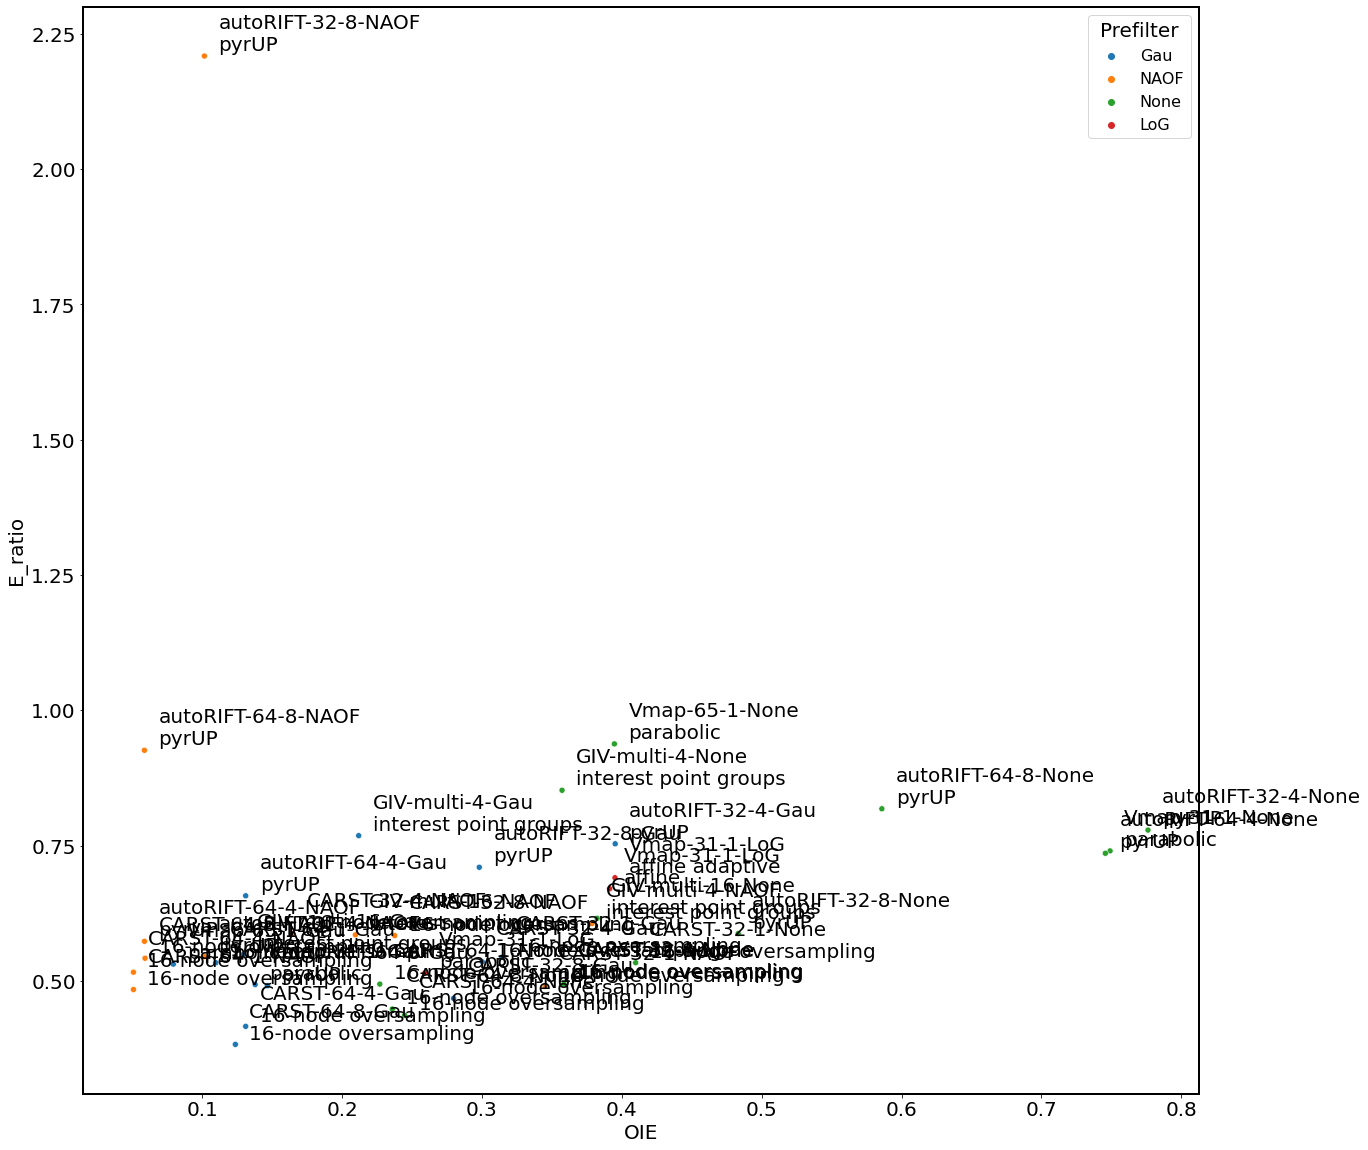

In [33]:
fig, ax5 = plt.subplots(1, 1, figsize=(20, 20))

sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', ax=ax5)

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel
    ax5.text(row['OIE'] + 0.01, row['E_ratio'] + 0.01, label)


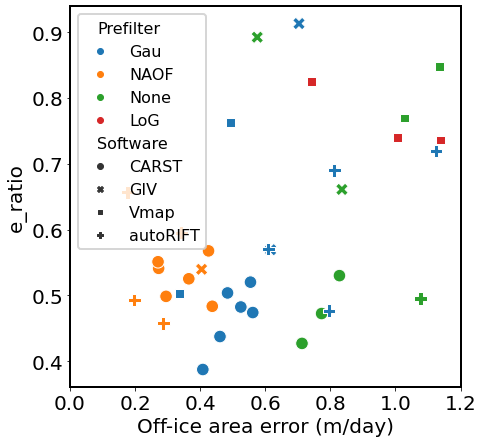

In [30]:
demo = df.loc[df['Date'] == datestrs[2]]
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
matplotlib.rc('axes', **axes_settings)
fig, ax6 = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
ax6.set_xlabel('Off-ice area error (m/day)')
ax6.set_ylabel('e_ratio')
ax6.set_xlim(0, 1.2)
legend = ax6.get_legend()
# legend.set_size(10)
legend.get_frame().set_linewidth(2)
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('OIE-vs-SS_updated.svg')

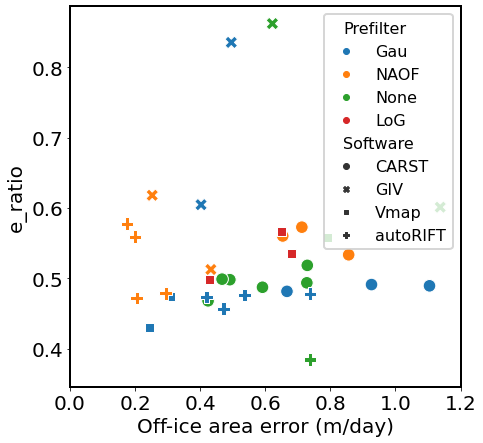

In [31]:
demo = df.loc[df['Date'] == datestrs[3]]
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
matplotlib.rc('axes', **axes_settings)
fig, ax6 = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
ax6.set_xlabel('Off-ice area error (m/day)')
ax6.set_ylabel('e_ratio')
ax6.set_xlim(0, 1.2)
legend = ax6.get_legend()
# legend.set_size(10)
legend.get_frame().set_linewidth(2)
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('OIE-vs-SS_updated.svg')